In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import io
import datetime
import matplotlib.lines as mlines
from fredapi import Fred
import statsmodels.formula.api as smf
import datetime
import scipy.stats as stats
from IPython.display import display, HTML 
display(HTML("<style>.container { width:50% !important; }</style>"))

# All of this is just set up for a strategy where we go long and short depending on where the price is relative to a filter
# You can run this with no changes

In [2]:
price = yf.download('AAPL')[['Adj Close']]

[*********************100%%**********************]  1 of 1 completed


In [3]:
# You can generalize this example to any series of returns
price = yf.download('GM')[['Adj Close']]

# Lets suppose we have a series of returns 
# This return series could be generated from a trading startegy 
returns = np.log(price).diff().dropna()
returns.columns = ['returns']

[*********************100%%**********************]  1 of 1 completed


In [4]:
# simple strategy where we go long if series crosses above filter
returns['Close'] = price[['Adj Close']]
returns['filter'] = returns[['Close']].ewm(alpha = .05).mean()
returns['signal'] = np.where(returns['Close'] > returns['filter'], 1, -1)

In [46]:
returns

,returns,Close,filter,signal,strat_returns,Returns
Date,,,,,,
2010-11-19,0.002045,26.080910,26.080910,-1,NaN,NaN
2010-11-22,-0.005268,25.943886,26.010641,-1,0.005268,-0.002043
2010-11-23,-0.024656,25.312035,25.765731,-1,0.024656,0.005282
2010-11-24,0.006894,25.487129,25.690634,-1,-0.006894,0.024962
2010-11-26,0.009513,25.730736,25.699497,1,-0.009513,-0.006870
...,...,...,...,...,...,...
2024-02-22,-0.003806,39.340000,36.991578,1,-0.003806,0.012305
2024-02-23,0.007345,39.630001,37.123499,1,0.007345,-0.003798
2024-02-26,0.004029,39.790001,37.256824,1,0.004029,0.007372


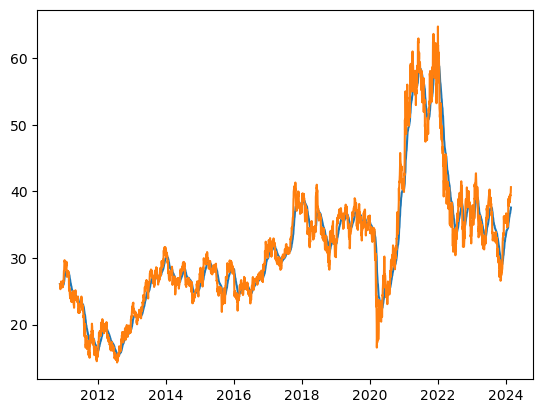

In [5]:
plt.plot(returns[['filter', 'Close']])

## Calculate your strategy returns the monthly level

In [6]:
# calculate the log strategy returns from the signals and log returns (already computed)
returns['strat_returns'] = 

In [7]:
# aggregate your log  returns at the monthly level and convert to simple returns
returns_m =

<Axes: xlabel='Date'>

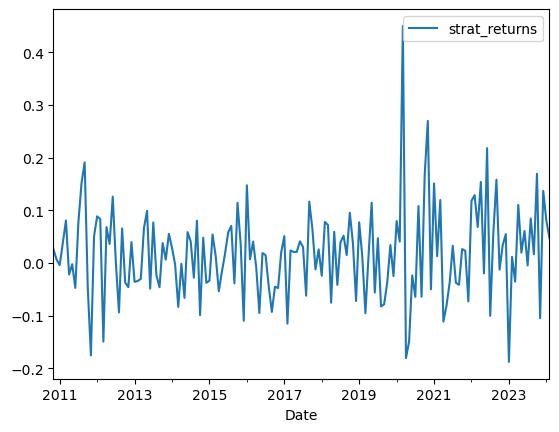

In [8]:
returns_m.plot()

In [48]:
returns_m[['Returns']].head()

,Returns
Date,
2010-11-30,0.030967
2010-12-31,0.128310
2011-01-31,0.109643
2011-02-28,0.151951
2011-03-31,0.053883


## Monthly Max Drawdown

In [ ]:
# calculate the cumulative return
dd_frame = (returns_m[['strat_returns']]+__).___
dd_frame.columns = ['creturn']

In [ ]:
# calculate cumulative max
dd_frame['cmax'] = dd_frame.__()

# fill in the variab;es
dd_frame['drawdowns'] = (dd_frame[__]-dd_frame[__])/dd_frame[__]

# this is the max drawdown
max_drawdown = dd_frame['drawdowns'].max()

# Find the date (index) of the max drawdown
max_drawdown_date = dd_frame['drawdowns'].idxmax()

print(f"Maximum Drawdown: {max_drawdown}")
print(f"Date of Maximum Drawdown: {max_drawdown_date}")

## Regression Metrics

In [ ]:
# run this -- no change
returns_m['SP500'] = (yf.download('^GSPC')[['Adj Close']].pct_change()+1).resample('M').prod()-1

yr1 = pd.read_csv('DGS1.csv', parse_dates = True, index_col = 0).replace('.', np.NaN).astype(float).dropna()
yr1 = (yr1.resample('M').last()/100+1)**(1/12)-1
yr1.columns = ['rf']
returns_m['rf'] = yr1.rf

In [ ]:
# make sure your returns df is in percentage units
returns_m = returns_m*100

# get the excess return for both the benchmark and your returns
returns_m[ ] = 
returns_m[ ] = 

In [ ]:
import statsmodels.formula.api as smf
# Alpha and beta
smf.ols('excess_AMZN~excess_SP500', data =returns_m).fit().summary()

In [ ]:
# Down Beta and Alpha
downdf = 
smf.ols('excess_AMZN~excess_SP500', data =downdf).fit().summary()